In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


(50000, 2)
Index(['review', 'sentiment'], dtype='object')
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64
review       0
sentiment    0
dtype: int64


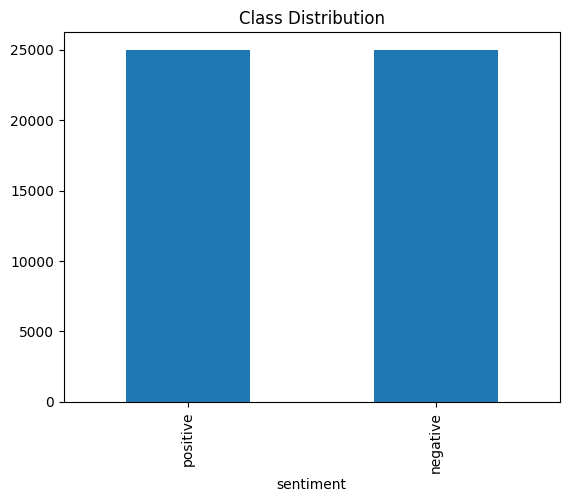

In [2]:


df = pd.read_csv(r'C:\Users\Raza Ali\Documents\Data Mining and ML\Assigment\nlp_assignment\IMDB Dataset.csv')

print(df.shape)
print(df.columns)
print(df.head())

print(df['sentiment'].value_counts())

df = df.dropna()
print(df.isnull().sum())

df['sentiment'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()


In [6]:


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(clean_text)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])

y = df['sentiment'].map({'positive':1, 'negative':0})


[nltk_data] Downloading package stopwords to C:\Users\Raza
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
